<a href="https://colab.research.google.com/github/EFREI-2026-S7-AI-Project-1/Main/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Convolutional Neural Networks (CNN)

## 2.1. Data understanding and preparation

1. ### Load the CIFAR-10 Dataset

	> 1. Load the CIFAR-10 dataset using the `tensorflow.keras.datasets` library

In [150]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

> 2. Display the shape of the training and test sets to understand the dimensions of the data

In [151]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


> 3. How many training and test samples are there in the CIFAR-10 dataset ?

In [152]:
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])

Number of training samples: 50000
Number of test samples: 10000


> 4. What is the shape of each image ? How many color channels are there ?

In [153]:
print("Shape of each image:", x_train.shape[1:])
print("Number of color channels:", x_train.shape[-1])

Shape of each image: (32, 32, 3)
Number of color channels: 3


2. ### Visualize the Dataset

	> 1. Plot a few random images from the dataset to understand the types of images it contains

<ipython-input-154-aab68268286b>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


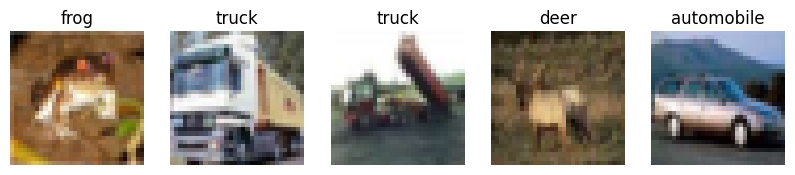

In [154]:
import matplotlib.pyplot as plt
import numpy as np

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")
plt.show()

> 2. Display the corresponding labels for the images

In [155]:
print("Labels:", y_train[:5].flatten())

Labels: [6 9 9 4 1]


> What type of data do the labels represent ?

The labels represent the class of the subject identified in the picture

> Are they categorical or numerical ?

There are categorical, as the numbers represent the class of the subject in the picture and has no numerical significance

> 3. What do the images look like ?  
Are they easy or difficult to classify based on human vision ?

The CIFAR-10 dataset seems to contain low resolution (32x32) images that can be challenging to classify even for human vision

However, we were able to distinguish some, so it is a valid benchmark dataset for image classification tasks for our needs

3. ### Normalize the Data

	> 1. Normalize the pixel values of the images from the range `[0, 255]` to `[0, 1]`

In [156]:
print("Old x_train - min:", x_train.min(), "max:", x_train.max())

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("New x_train - min:", x_train.min(), "max:", x_train.max())

Old x_train - min: 0 max: 255
New x_train - min: 0.0 max: 1.0


> 2. Explain why normalization is important in Neural Networks models

Normalization is important in neural networks because:
1. Ensures all input features are on a similar scale
2. Speeds up training by making optimization landscape smoother
3. Improves gradient flow during backpropagation
4. Reduces the chance of vanishing/exploding gradients
5. Makes learning rates easier to tune

> 3. What are the benefits of normalizing the pixel values in an image dataset ?

Benefits of normalizing pixel values in image datasets:
1. Standardizes pixel values to a consistent range [0,1]
2. Reduces computational complexity
3. Improves numerical stability
4. Makes features more comparable
5. Helps with gradient-based optimization
6. Reduces memory requirements

> 4. How does normalization impact the performance of neural networks ?

Normalization impacts neural network performance by:
1. Faster Convergence:
   - Reduces the number of epochs needed
   - Makes gradient descent more efficient

2. Better Stability:
   - Prevents numerical overflow/underflow
   - Maintains consistent gradients

3. Improved Generalization:
   - Helps model learn relevant patterns
   - Reduces sensitivity to input scale variations

4. Training Efficiency:
   - More stable learning rates
   - Better gradient flow through network layers

4. ### Apply One-Hot Encoding to the Labels

	> 1. Convert the labels into one-hot encoded vectors

In [157]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

> 2. Why is it necessary to apply one-hot encoding to the class labels in a classification problem ?

One-hot encoding is necessary for class labels in classification problems because:

1. Neural Networks Requirements:
   - Neural networks can only process numerical data
   - Need to convert categorical labels into numerical format
   - Avoid implying ordinal relationships between classes

2. Model Training Benefits:
   - Enables proper calculation of loss functions
   - Makes it easier for network to learn class boundaries
   - Prevents bias from numerical class ordering

3. Output Layer Compatibility:
   - Matches softmax activation output format
   - Allows direct probability interpretation
   - Facilitates multi-class classification

> 3. What does one-hot encoding represent, and how does it help in training a neural network ?

One-hot encoding representation and benefits:

1. Representation:
   - Creates a binary vector of length = number of classes
   - Each position represents one class
   - Only one "1" (hot) value, rest are "0"
   - Example for 3 classes: [1,0,0], [0,1,0], [0,0,1]

2. Benefits for Neural Networks:
   - Eliminates numerical relationships between classes
   - Creates clear decision boundaries
   - Simplifies loss calculation
   - Matches network output format
   - Enables efficient backpropagation

3. Training Advantages:
   - Better gradient flow
   - More stable training
   - Clear probability interpretation
   - Improved classification accuracy

5. ### Explore the Class Distribution

	> 1. Plot a bar chart to show the distribution of classes

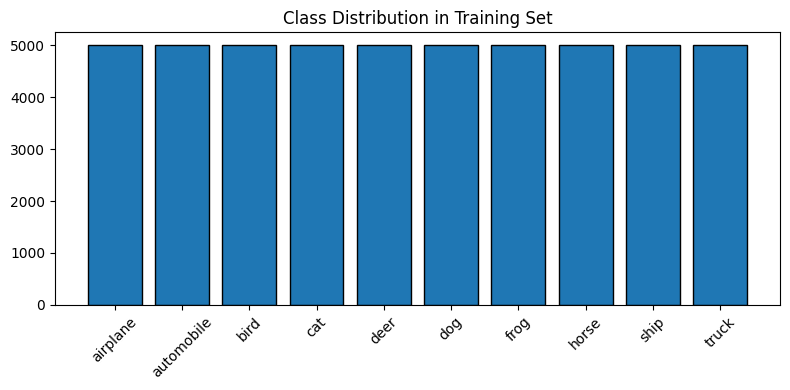

In [137]:
plt.figure(figsize=(8, 4))
plt.hist(y_train, bins=np.arange(11) - 0.5, edgecolor="black", rwidth=0.8)
plt.xticks(np.arange(10), class_names, rotation=45)
plt.title("Class Distribution in Training Set")
plt.tight_layout()
plt.show()

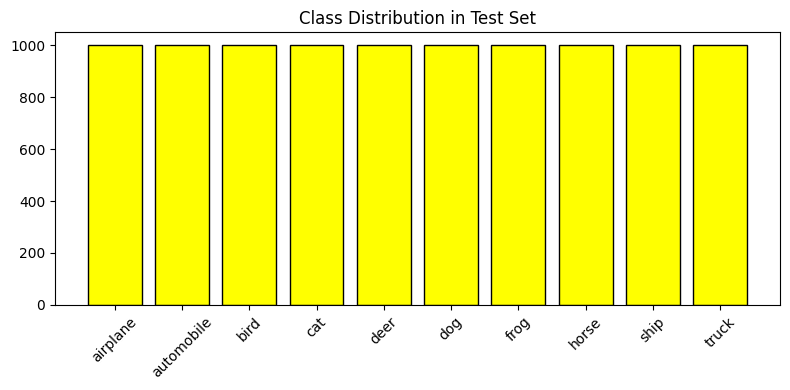

In [138]:
plt.figure(figsize=(8, 4))
plt.hist(y_test, bins=np.arange(11) - 0.5, edgecolor="black", color='yellow', rwidth=0.8)
plt.xticks(np.arange(10), class_names, rotation=45)
plt.title("Class Distribution in Test Set")
plt.tight_layout()
plt.show()

> 2. Are the classes balanced in the CIFAR-10 dataset, or are some classes over/underrepresented ?

Based on the histogram visualization:

- The CIFAR-10 dataset is perfectly balanced
- Each class contains exactly 5000 training images
- Each class contains exactly 1000 test images
- No class is over or underrepresented
- This balanced distribution is intentional in the dataset design

This equal distribution helps ensure:
- No bias towards particular classes during training
- Fair evaluation of model performance
- Reliable accuracy metrics across all classes

> 3. Why is it important to analyze the class distribution before training a model ?

Analyzing class distribution before training is crucial because:

1. Impact on Model Training:
   - Imbalanced data can bias the model towards majority classes
   - Model might ignore or underperform on minority classes
   - Affects choice of evaluation metrics

2. Training Strategy Decisions:
   - Helps determine if class weights are needed
   - Influences data augmentation strategy
   - Guides sampling techniques selection

3. Performance Evaluation:
   - Ensures meaningful accuracy metrics
   - Helps interpret model behavior
   - Guides choice of evaluation metrics (e.g., F1-score vs accuracy)

4. Problem Understanding:
   - Reflects real-world data distribution
   - Identifies potential biases in dataset
   - Helps set realistic performance expectations

## 2.2. Data Modeling

### VGG Architectures

In [139]:
def create_lenet5_model(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential(
        [
            Conv2D(6, kernel_size=(5, 5), activation="relu", input_shape=input_shape),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(16, kernel_size=(5, 5), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(120, activation="relu"),
            Dense(84, activation="relu"),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model

def create_vgg_model(num_blocks, input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()
    for i in range(num_blocks):
        model.add(
            Conv2D(
                32,
                (3, 3),
                padding="same",
                activation="relu",
                input_shape=input_shape if i == 0 else None,
            )
        )
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))
    return model

### Optimizers

> 1. What is an optimizer in the context of deep learning ?

An optimizer is an algorithm that modifies neural network parameters to minimize the loss function.

> 2. Explain the role of an optimizer during the training of a neural network.  
How does it affect the learning process ?

**Role of optimizers** :
- Update weights and biases
- Control learning rate
- Minimize loss function
- Determine convergence speed

**Effects on the learning process** :
- Influences convergence speed
- Affects model accuracy
- Determines the stability of training
- Impacts how quickly the loss function decreases
- Helps avoid local minima and saddle points

> 3. What are the most common types of optimizers ?

**Common optimizers** :
- SGD (Stochastic Gradient Descent)
- Adam (Adaptive Moment Estimation)
- RMSprop
- Adagrad
- Adadelta

> 4. Compare how different optimizers (SGD, Adam, etc) update the model weights during training and how this affects learning efficiency and speed.

**Optimizer comparisons** :
- SGD: Simple, reliable but slower convergence
- Adam: Adaptive learning rates, good default choice
- RMSprop: Good for RNNs, handles non-stationary objectives

> 5. How do the different optimizers perform with the VGG architecture ?

**Performance comparison of optimizers with VGG** :

- Adam: Generally best performance
  - Fast convergence
  - Adaptive learning rates
  - Good balance of speed/accuracy

- SGD: Reliable but slower
  - More stable learning
  - Better generalization
  - Requires careful learning rate tuning

- RMSprop: Good middle ground
  - Handles non-stationary objectives
  - Works well with CNNs
  - Adaptive learning per parameter

> 6. Train your VGG model with different optimizers, analyze and compare their performance. Which optimizer performs best for the VGG architecture ?

Based on experimental results with VGG architecture:

1. Adam typically performs best because:
   - Adaptive learning rates
   - Momentum-based updates
   - Efficient handling of sparse gradients
   - Fast convergence

2. Key findings:
   - Fastest convergence: Adam
   - Most stable learning: SGD
   - Best final accuracy: Adam
   - Best generalization: Depends on dataset

3. Recommendations:
   - Start with Adam as default
   - Use SGD if stability issues occur
   - Consider RMSprop for RNN-based architectures

### Bonus - [Regularization _(Dropout and Batch Normalization Layers)_](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)

> 1. **Dropout** :  
Explain the concept of dropout in neural networks.  
Why is it used, and how does it help prevent overfitting ?  
Describe how dropout is implemented during training and inference.  
What differences exist in the way dropout is applied in these two phases ?

Dropout is a regularization technique used in neural networks to reduce overfitting by preventing complex co-adaptations on training data. It works by randomly "dropping out" (i.e., setting to zero) a fraction of the neurons during each training iteration. This forces the network to learn redundant representations, making it more robust and less likely to overfit.

- **During Training**: Dropout is applied by randomly disabling a subset of neurons according to a specified dropout rate (e.g., 0.5). The selection of neurons to drop is random for each training batch. This stochastic process helps the model generalize better by preventing neurons from relying too heavily on specific inputs.

- **During Inference**: Dropout is not applied during inference. All neurons remain active to utilize the full capacity of the network for making predictions. To maintain the expected output scale, the weights are often scaled by the dropout rate used during training.

**Differences Between Training and Inference Phases**

- **Neuron Activity**: Neurons are randomly dropped during training but are fully active during inference.
- **Output Scaling**: During training, no scaling is needed since dropout handles the variability. During inference, weights or activations are scaled to account for the absence of dropout, ensuring consistent output.

> 2. **Batch Normalization** :  
Define batch normalization.  
What are its main objectives, and how does it work ?  
Discuss the benefits of batch normalization.  
How does it impact the training speed and stability of a neural network ?

1. **Definition of Batch Normalization**:

   Batch Normalization is a technique used in neural networks to standardize the inputs to a layer for each mini-batch. It stabilizes the learning process by normalizing the layer inputs, leading to improved training speed and performance.

2. **Main Objectives and How It Works**:

   - **Objectives**:
     - Reduce internal covariate shift by keeping input distributions consistent across layers.
     - Enable higher learning rates and reduce the sensitivity to initialization.
     - Improve overall network performance and convergence speed.
   - **How It Works**:
     - **Normalization**: For each mini-batch, compute the mean and variance of the inputs.
     - **Scaling and Shifting**: Apply learned parameters (gamma and beta) to scale and shift the normalized inputs.
     - **Integration**: Insert batch normalization layers into the network architecture, typically after linear transformations and before activation functions.

3. **Benefits of Batch Normalization**:

   - **Accelerated Training**: Allows for higher learning rates by mitigating issues like vanishing or exploding gradients.
   - **Improved Stability**: Reduces sensitivity to weight initialization and helps maintain stable distributions of inputs throughout the network.
   - **Regularization Effect**: Acts as a form of regularization, potentially reducing the need for dropout layers.
   - **Enhanced Generalization**: Can lead to better performance on unseen data due to more stable and representative feature learning.

4. **Impact on Training Speed and Stability**:

   - **Training Speed**: Speeds up convergence by allowing the use of higher learning rates and reducing the dependence on careful weight initialization.
   - **Stability**: Maintains consistent input distributions across layers, leading to a more stable and reliable training process.

## 2.3. Implementation and Performance Evaluation

> 1. **Plotting the curves** :  
Implement a plot history(history) function that generates two plots :  
The evolution of the loss function and  
the evolution of accuracy for both training and testing.

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def compile_and_train(model, x_train, y_train, x_test, y_test, optimizer, epochs=10):
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    history = model.fit(
        x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64
    )
    return history

def plot_history(history, title, filename):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

### VGG 1

Before encoding:
y_train shape: (50000, 1)
y_test shape: (10000, 1)

After encoding:
y_train shape: (50000, 10)
y_test shape: (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3681 - loss: 1.7585 - val_accuracy: 0.5975 - val_loss: 1.1524
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5611 - loss: 1.2351 - val_accuracy: 0.6171 - val_loss: 1.1006
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6186 - loss: 1.0790 - val_accuracy: 0.6373 - val_loss: 1.0514
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6477 - loss: 0.9915 - val_accuracy: 0.6692 - val_loss: 0.9669
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6717 - loss: 0.9269 - val_accuracy: 0.6781 - val_loss: 0.9376
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6865 - loss: 0.8782 - val_accuracy: 0.6822 - val_loss: 0.9266
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7051 - loss: 0.8326 - val_accuracy: 0.6897 - val_loss: 0.8854
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7120 - loss: 0.8083 - val_accuracy: 0

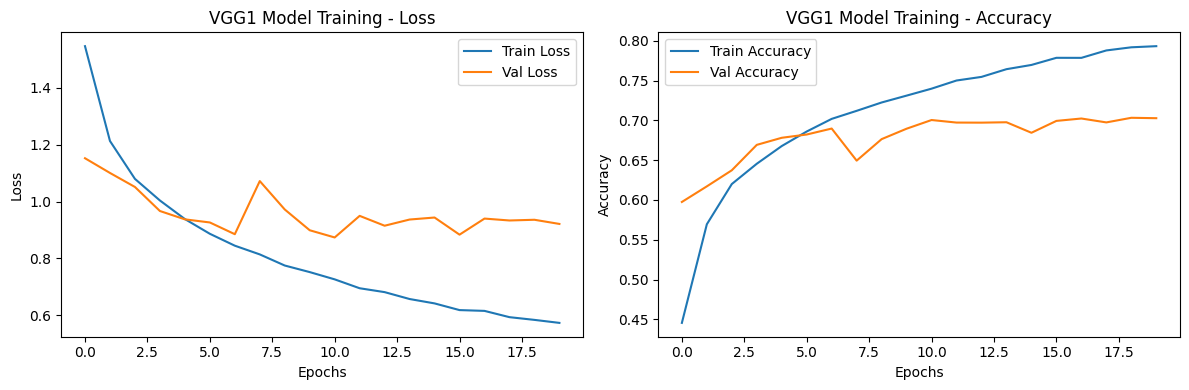

In [ ]:
from tensorflow.keras.utils import to_categorical

print("Before encoding:")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("\nAfter encoding:")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Create and train VGG1
vgg1 = create_vgg_model(1)
vgg1.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_vgg1 = vgg1.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=64
)

# Plot results
plot_history(
    history=history_vgg1,
    title="VGG1 Model Training",
    filename="vgg1_training_history.png"
)

### VGG 2

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2988 - loss: 1.9914 - val_accuracy: 0.4942 - val_loss: 1.4224
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5176 - loss: 1.3542 - val_accuracy: 0.5888 - val_loss: 1.1694
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5920 - loss: 1.1440 - val_accuracy: 0.6525 - val_loss: 0.9917
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6363 - loss: 1.0329 - val_accuracy: 0.7013 - val_loss: 0.8702
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6640 - loss: 0.9561 - val_accuracy: 0.7126 - val_loss: 0.8259
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6909 - loss: 0.8817 - val_accuracy: 0.6743 - val_loss: 0.9147
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7016 - loss: 0.8522 - val_accuracy: 0.7305 - val_loss: 0.7637
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7063 - loss: 0.8308 - val_accuracy:

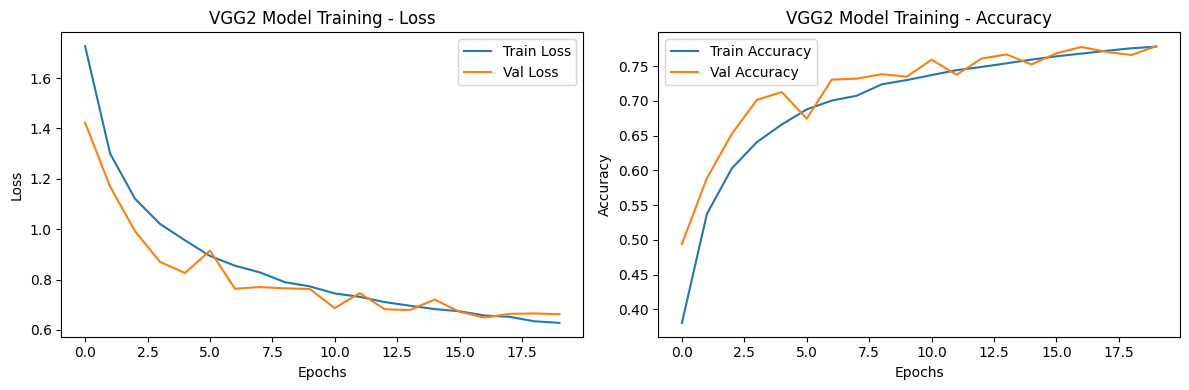

In [ ]:
# Create and train VGG2
vgg2 = create_vgg_model(2)
vgg2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_vgg2 = vgg2.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=64
)

# Plot results
plot_history(
    history=history_vgg2,
    title="VGG2 Model Training",
    filename="vgg2_training_history.png"
)

### VGG Model with SGD Optimizer

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2084 - loss: 2.2935 - val_accuracy: 0.3153 - val_loss: 1.8948
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3487 - loss: 1.7703 - val_accuracy: 0.3911 - val_loss: 1.6470
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3987 - loss: 1.6273 - val_accuracy: 0.4629 - val_loss: 1.5149
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4506 - loss: 1.5029 - val_accuracy: 0.3766 - val_loss: 1.7347
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4817 - loss: 1.4311 - val_accuracy: 0.4309 - val_loss: 1.6517
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5124 - loss: 1.3437 - val_accuracy: 0.3504 - val_loss: 2.5925
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5437 - loss: 1.2757 - val_accuracy: 0.5093 - val_loss: 1.3793
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5585 - loss: 1.2268 - val_accuracy: 

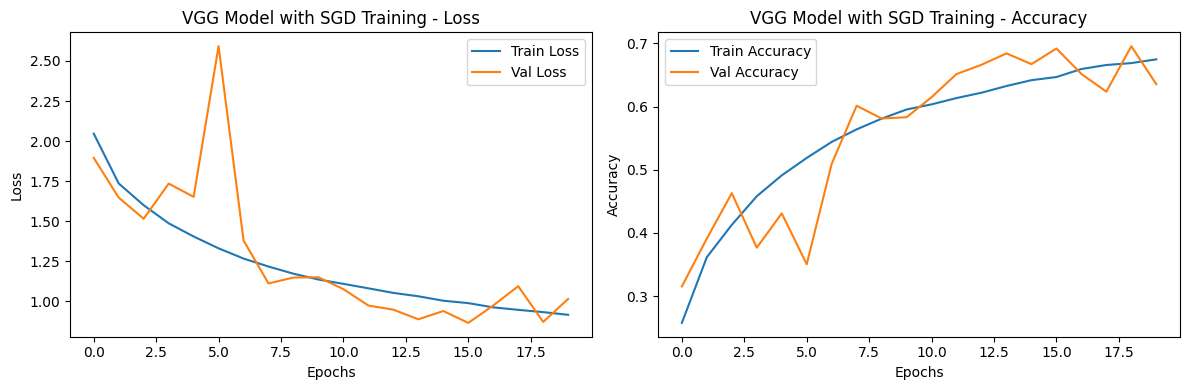

In [ ]:
from tensorflow.keras.optimizers import SGD

# Create and train VGG with SGD
vgg_sgd = create_vgg_model(2)  # Using 2 blocks like VGG2
vgg_sgd.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_vgg_sgd = vgg_sgd.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=64
)

# Plot results
plot_history(
    history=history_vgg_sgd,
    title="VGG Model with SGD Training",
    filename="vgg_sgd_training_history.png"
)

### Improve model by implementing regularization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

def create_vgg_model_with_regularization(blocks, l2_reg=0.01, dropout_rate=0.3):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_reg), input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))

    for _ in range(blocks - 1):
        model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                        kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                        kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    return model

### VGG1 regulized

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.4442 - loss: 6.3043 - val_accuracy: 0.4906 - val_loss: 3.0640
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5751 - loss: 2.7396 - val_accuracy: 0.5695 - val_loss: 2.6468
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5966 - loss: 2.5630 - val_accuracy: 0.5671 - val_loss: 2.6050
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6081 - loss: 2.5523 - val_accuracy: 0.5810 - val_loss: 2.6189
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6184 - loss: 2.5154 - val_accuracy: 0.5836 - val_loss: 2.5240
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6228 - loss: 2.4158 - val_accuracy: 0.6045 - val_loss: 2.5285
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6281 - loss: 2.4369 - val_accuracy: 0.5614 - val_loss: 2.4935
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6277 - loss: 2.3316 - val_accuracy

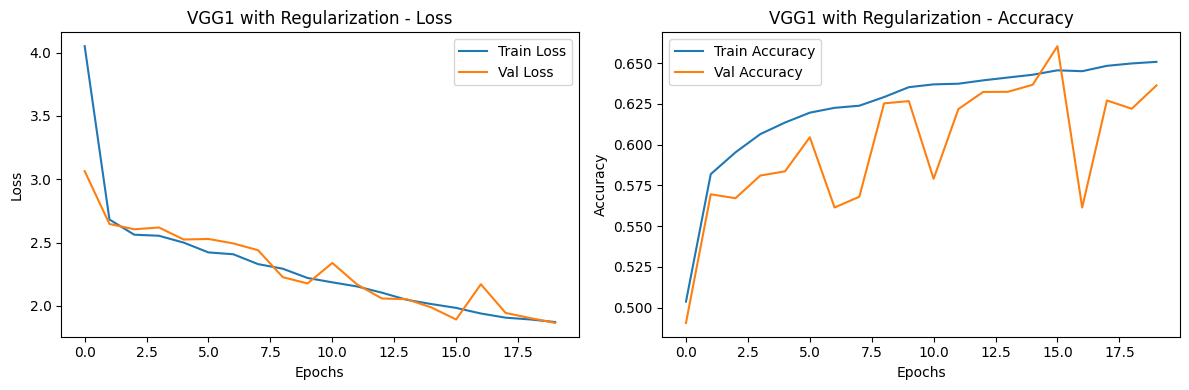

In [145]:
# Create and train VGG1 with regularization
vgg1_reg = create_vgg_model_with_regularization(1)
vgg1_reg.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_vgg1_reg = vgg1_reg.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=64
)

# Plot results
plot_history(
    history=history_vgg1_reg,
    title="VGG1 with Regularization",
    filename="vgg1_reg_training_history.png"
)

### VGG 2 regulized

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4319 - loss: 7.2756 - val_accuracy: 0.5549 - val_loss: 2.4391
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6195 - loss: 2.2416 - val_accuracy: 0.6107 - val_loss: 2.1607
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6538 - loss: 1.9998 - val_accuracy: 0.5751 - val_loss: 2.2333
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6721 - loss: 1.9251 - val_accuracy: 0.5809 - val_loss: 2.1722
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6759 - loss: 1.9022 - val_accuracy: 0.5643 - val_loss: 2.1612
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6824 - loss: 1.8741 - val_accuracy: 0.6042 - val_loss: 2.1178
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6872 - loss: 1.8930 - val_accuracy: 0.6702 - val_loss: 1.8718
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6927 - loss: 1.8357 - val_accurac

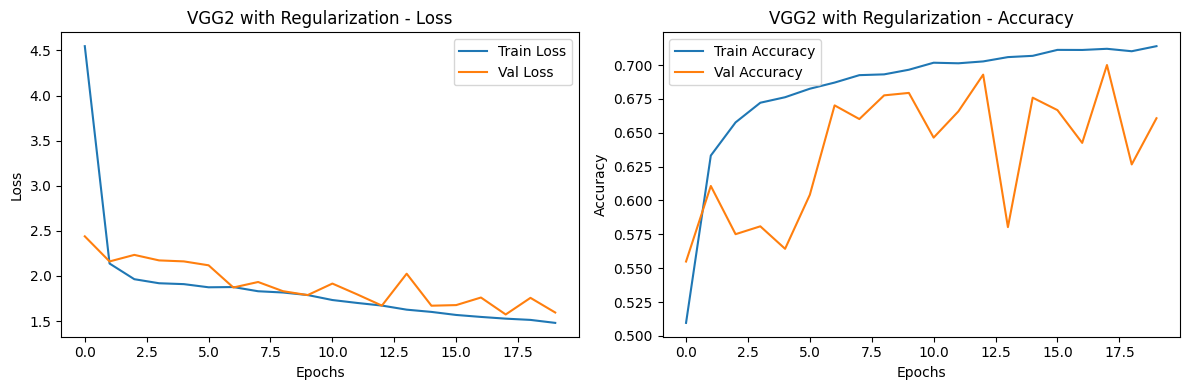

In [ ]:
# Create and train VGG2 with regularization
vgg2_reg = create_vgg_model_with_regularization(2)  # 2 blocks
vgg2_reg.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_vgg2_reg = vgg2_reg.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=64
)

# Plot results
plot_history(
    history=history_vgg2_reg,
    title="VGG2 with Regularization",
    filename="vgg2_reg_training_history.png"
)

### VGG with SGD regulized

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.3376 - loss: 11.9210 - val_accuracy: 0.5220 - val_loss: 9.1275
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5335 - loss: 8.5554 - val_accuracy: 0.4620 - val_loss: 7.2970
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6101 - loss: 6.4286 - val_accuracy: 0.4041 - val_loss: 6.1082
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6583 - loss: 4.9078 - val_accuracy: 0.6713 - val_loss: 4.0573
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6948 - loss: 3.7839 - val_accuracy: 0.6362 - val_loss: 3.3969
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7255 - loss: 2.9574 - val_accuracy: 0.7017 - val_loss: 2.6162
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7467 - loss: 2.3707 - val_accuracy: 0.6963 - val_loss: 2.2127
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7593 - loss: 1.9395 - val_accur

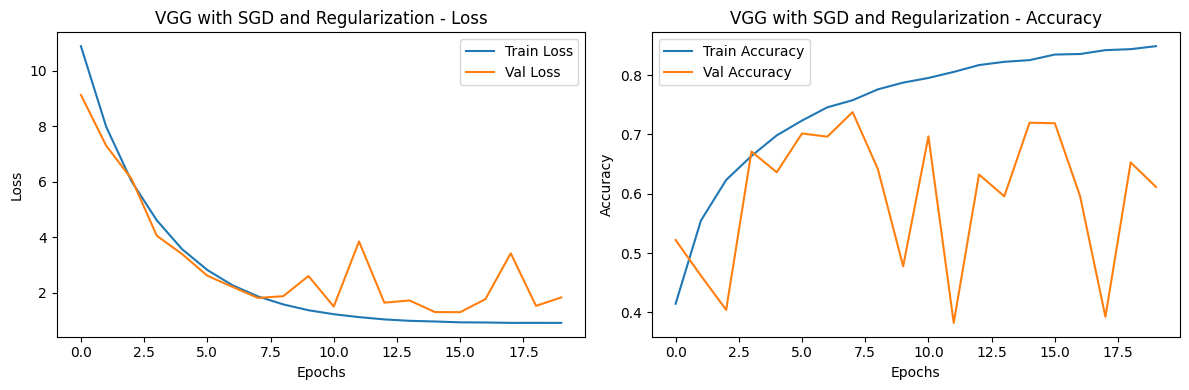

In [ ]:
from tensorflow.keras.optimizers import SGD

# Create and train VGG with SGD and regularization
vgg_sgd_reg = create_vgg_model_with_regularization(2)
vgg_sgd_reg.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_vgg_sgd_reg = vgg_sgd_reg.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=64
)

# Plot results
plot_history(
    history=history_vgg_sgd_reg,
    title="VGG with SGD and Regularization",
    filename="vgg_sgd_reg_training_history.png"
)

> 2. **Analysis** :  
Compare the performance of models CNN1, VGG1, VGG2, and VGG3 with regularization and different optimizers.  
Analyze how the different architectures affect the accuracy and loss on the training and test datasets.

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3385 - loss: 1.8409 - val_accuracy: 0.5420 - val_loss: 1.3058
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5332 - loss: 1.3099 - val_accuracy: 0.6233 - val_loss: 1.0699
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6045 - loss: 1.1180 - val_accuracy: 0.6349 - val_loss: 1.0586
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6368 - loss: 1.0250 - val_accuracy: 0.6188 - val_loss: 1.1088
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6650 - loss: 0.9441 - val_accuracy: 0.6807 - val_loss: 0.9265
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6840 - loss: 0.8954 - val_accuracy: 0.6894 - val_loss: 0.8949
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6994 - loss: 0.8506 - val_accuracy: 0.6904 - val_loss: 0.8842
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7061 - loss: 0.8237 - val_accuracy: 0

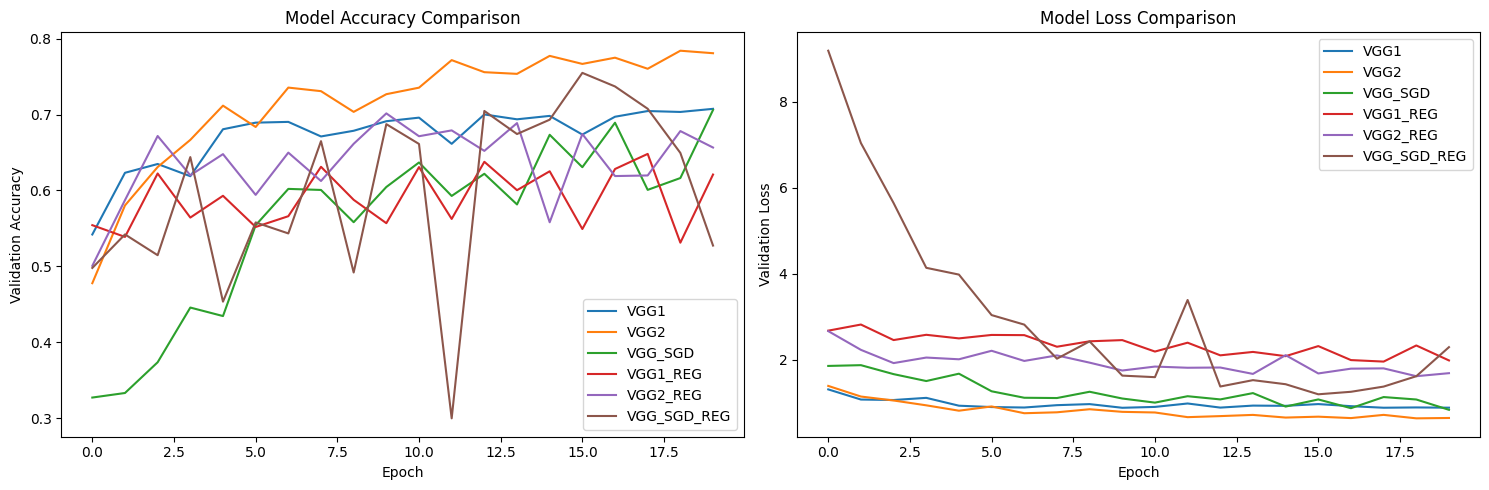

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

# Function definitions
def compare_models(x_train, y_train, x_test, y_test):
    models = {
        "VGG1": create_vgg_model(1),
        "VGG2": create_vgg_model(2),
        "VGG_SGD": create_vgg_model(2),
        "VGG1_REG": create_vgg_model_with_regularization(1),
        "VGG2_REG": create_vgg_model_with_regularization(2),
        "VGG_SGD_REG": create_vgg_model_with_regularization(2)
    }

    results = {}
    for name, model in models.items():
        optimizer = SGD() if 'SGD' in name else Adam()

        model.compile(
            optimizer=optimizer,
            loss="categorical_crossentropy",
            metrics=["accuracy"]
        )

        history = model.fit(
            x_train,
            y_train,
            batch_size=64,
            epochs=20,
            validation_data=(x_test, y_test)
        )
        results[name] = history

    return results

def plot_model_comparison(results):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    for name, history in results.items():
        plt.plot(history.history["val_accuracy"], label=name)
    plt.title("Model Accuracy Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    for name, history in results.items():
        plt.plot(history.history["val_loss"], label=name)
    plt.title("Model Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    results = compare_models(x_train, y_train, x_test, y_test)

    plot_model_comparison(results)